In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Bengaluru_House_Data.csv")

# Data cleaning

In [2]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#
df1 = df.drop(["area_type","society","balcony","availability"],axis="columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df2["BHK"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-9-e6751cf03937>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BHK"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [10]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df2["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def sqft_to_float(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
#sample
sqft_to_float("16-20")

18.0

In [16]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(sqft_to_float)
df3.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
df3 = df3.drop(["size"],axis=1)
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# Feature engineering

In [18]:
df4 = df3.copy()
df4["price_per_sqft"] = df4["price"]*100000/df4["total_sqft"]
df4.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,1020.0,6.0,370.00,6,36274.509804


In [19]:
len(df4.location.unique())

1304

In [20]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [21]:
len(location_stats[location_stats<=10])

1052

In [22]:
loc_less_10 = location_stats[location_stats<=10]
loc_less_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [23]:
df4.location = df4.location.apply(lambda x: "other" if x in loc_less_10 else x)
len(df4.location.unique())

242

# Outlier detection and removal

In [24]:
df4[df4.total_sqft/df4.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [25]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12502, 6)

In [26]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [27]:
def pps_ol_remove(df5):
    df_out = pd.DataFrame()
    for key, subdf in df5.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        red_df = subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,red_df],ignore_index=True)
    return df_out

In [28]:
final_df = pps_ol_remove(df5)
final_df.shape

(10241, 6)

In [29]:
df.shape

(13320, 9)

In [30]:
final_df.shape

(10241, 6)

# Model building

In [31]:
final_df = final_df.drop(["location"],axis=1)
final_df.head()

,total_sqft,bath,price,BHK,price_per_sqft
0,2850.0,4.0,428.0,4,15017.543860
1,1630.0,3.0,194.0,3,11901.840491
2,1875.0,2.0,235.0,3,12533.333333
3,1200.0,2.0,130.0,3,10833.333333
4,1235.0,2.0,148.0,2,11983.805668


# Test run

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = final_df[['total_sqft', 'bath', 'BHK', 'price_per_sqft']]
y = final_df['price']

In [34]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=1/3,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
pr = lm.predict(X_test)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

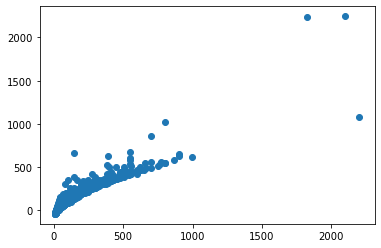

In [40]:
plt.scatter(y_test,pr)

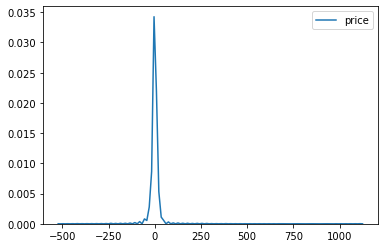

In [41]:
sns.kdeplot(y_test-pr)

In [42]:
pr

array([ 40.28234042,   0.56307697,  38.90250525, ...,  53.32725307,
       144.51889813, 134.57595966])

In [43]:
lm.coef_

array([ 0.07512001, -0.33523087, -8.47447112,  0.01906429])

In [44]:
lm.intercept_

-106.61840504013853

In [45]:
from sklearn import metrics

In [46]:
print("MAE->",metrics.mean_absolute_error(y_test,pr))
print("MSE->",metrics.mean_squared_error(y_test,pr))
print("RMSE->",np.sqrt(metrics.mean_squared_error(y_test,pr)))
print("R^2->", round(metrics.r2_score(y_test, pr)*100),"%")

MAE-> 12.38454781230328
MSE-> 726.9444700679422
RMSE-> 26.9619077601705
R^2-> 91.0 %


In [47]:
import pickle

# dumping the random forest model:
with open("model.pkl","wb") as f:
    pickle.dump(lm,f)
    
with open("model.pkl","rb") as f:
    test_pred = pickle.load(f)

In [64]:
X.iloc[1:2,:]

,total_sqft,bath,BHK,price_per_sqft
1,1630.0,3.0,3,11901.840491


In [53]:
y.head(1)

0    428.0
Name: price, dtype: float64

In [55]:
test_pred.predict([[1.63000000e+03, 3.00000000e+00, 3.00000000e+00, 1.19018405e+04]])

array([216.298274])

In [61]:
X.columns

Index(['total_sqft', 'bath', 'BHK', 'price_per_sqft'], dtype='object')